In [5]:
# NB: Code is not complete since lemmitizing is taking too long to complete

<IPython.core.display.Javascript object>

In [6]:
!pip install nb_black

You should consider upgrading via the 'c:\users\alu student\anaconda3\jupyter1\python.exe -m pip install --upgrade pip' command.


<IPython.core.display.Javascript object>

## DATA CLEANING & LEMMITIZING

In [4]:
import numpy as np
import pandas as pd
import os

from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

# cleaning and dropping stop words
import re
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

from nltk.stem import WordNetLemmatizer

# performance check
import time



[nltk_data] Downloading package stopwords to C:\Users\ALU
[nltk_data]     STUDENT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df = pd.read_csv(os.path.join("..", "data", "mbti_1.csv"))

# splitting data into training and holdout dataset
personality_data, df_holdout = train_test_split(
    df, random_state=42, test_size=0.01, stratify=df["type"]
)

# saving the training and holdout datasets
personality_data.to_csv(os.path.join("..", "data", "personality_data.csv"), index=False)
df_holdout.to_csv(os.path.join("..", "data", "df_holdout.csv"), index=False)

# checking the value counts
print(personality_data["type"].value_counts())
print(df_holdout["type"].value_counts())

INFP    1814
INFJ    1455
INTP    1291
INTJ    1080
ENTP     678
ENFP     668
ISTP     334
ISFP     268
ENTJ     229
ISTJ     203
ENFJ     188
ISFJ     164
ESTP      88
ESFP      47
ESFJ      42
ESTJ      39
Name: type, dtype: int64
INFP    18
INFJ    15
INTP    13
INTJ    11
ENTP     7
ENFP     7
ISTP     3
ISFP     3
ENTJ     2
ISFJ     2
ENFJ     2
ISTJ     2
ESFP     1
ESTP     1
Name: type, dtype: int64



#### MBTI(personality data) evaluates the personality along 4 different traits, representing the way one processes the surrounding information based on their preferences and natural tendencies. The four traits are:

#### Extraversion (E) vs. Introversion (I) 
#### Sensing (S) vs. Intuition (N)
#### Thinking (T) vs. Feeling (F)
#### Judging (J) vs. Perceiving (P)

In [6]:
# Personality data used for training and testing the model
personality_data = pd.read_csv(os.path.join("..", "data", "personality_data.csv"))

In [7]:
# looking at the top 5 rows of the dataset
personality_data.head()

,type,posts
0,INFJ,'When asked of the things you wish you did ear...
1,INFJ,'I love both and they are equally important to...
2,INFJ,Really? You think implying that everyone who i...
3,ENFJ,'Love is a crazy thing. Se is our best form ...
4,INTP,'I am a physics undergrad with a computation e...


In [8]:
# checking the number of rows and columns
personality_data.shape

(8588, 2)

#### Checking for Null values

In [9]:
personality_data.isnull().sum()

type     0
posts    0
dtype: int64

#### Checking for Class Imbalance

In [10]:
# checking number of records for each of the 16 personality types
personality_data["type"].value_counts()

INFP    1814
INFJ    1455
INTP    1291
INTJ    1080
ENTP     678
ENFP     668
ISTP     334
ISFP     268
ENTJ     229
ISTJ     203
ENFJ     188
ISFJ     164
ESTP      88
ESFP      47
ESFJ      42
ESTJ      39
Name: type, dtype: int64

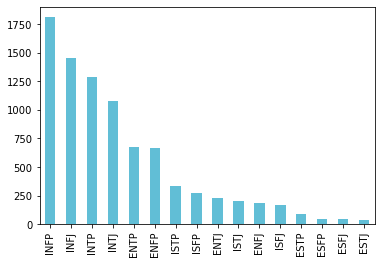

In [11]:
# visual
personality_data["type"].value_counts().plot(kind="bar", color="#61BED6")
plt.show()

In [15]:
#there seems to be an imbalance
# to handle the class imbalance better, converting the 16 classes into 4 more balanced classes


<IPython.core.display.Javascript object>

In [12]:
personality_data["is_Extrovert"] = personality_data["type"].apply(
    lambda x: 1 if x[0] == "E" else 0
)
personality_data["is_Sensing"] = personality_data["type"].apply(
    lambda x: 1 if x[1] == "S" else 0
)
personality_data["is_Thinking"] = personality_data["type"].apply(
    lambda x: 1 if x[2] == "T" else 0
)
personality_data["is_Judging"] = personality_data["type"].apply(
    lambda x: 1 if x[3] == "J" else 0
)

# rearranging the dataframe columns
personality_data = personality_data[
    ["type", "is_Extrovert", "is_Sensing", "is_Thinking", "is_Judging", "posts"]
]
personality_data.head()

,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,posts
0,INFJ,0,0,0,1,'When asked of the things you wish you did ear...
1,INFJ,0,0,0,1,'I love both and they are equally important to...
2,INFJ,0,0,0,1,Really? You think implying that everyone who i...
3,ENFJ,1,0,0,1,'Love is a crazy thing. Se is our best form ...
4,INTP,0,0,1,0,'I am a physics undergrad with a computation e...


#NB:

Extroversion vs. Introversion
I - 0
E - 1 
    
Sensing vs. Intuition 
N - 0 
S - 1
    
Thinking vs. Feeling
F - 0
T - 1
    
Judging vs. Perceiving
P - 0
J - 1 

In [15]:
# checking individual counts
introvert_count = personality_data["is_Extrovert"].value_counts()[0]
extrovert_count = personality_data["is_Extrovert"].value_counts()[1]

intuition_count = personality_data["is_Sensing"].value_counts()[0]
sensing_count = personality_data["is_Sensing"].value_counts()[1]

feeling_count = personality_data["is_Thinking"].value_counts()[0]
thinking_count = personality_data["is_Thinking"].value_counts()[1]

perceiving_count = personality_data["is_Judging"].value_counts()[0]
judging_count = personality_data["is_Judging"].value_counts()[1]

In [16]:
# printing all the counts
print(f"Introvert Count: {introvert_count}")
print(f"Extrovert Count: {extrovert_count}")
print(f"Intuition Count: {intuition_count}")
print(f"Sensing Count: {sensing_count}")
print(f"Feeling Count: {feeling_count}")
print(f"Thinking Count: {thinking_count}")
print(f"Perceiving Count: {perceiving_count}")
print(f"Judging Count: {judging_count}")

Introvert Count: 6609
Extrovert Count: 1979
Intuition Count: 7403
Sensing Count: 1185
Feeling Count: 4646
Thinking Count: 3942
Perceiving Count: 5188
Judging Count: 3400


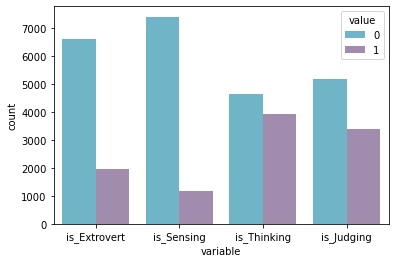

In [17]:
sns.countplot(
    x="variable",
    hue="value",
    data=pd.melt(
        personality_data[["is_Extrovert", "is_Sensing", "is_Thinking", "is_Judging"]]
    ),
    palette=["#61BED6", "#A386B4"],
)

plt.show()

The class imbalance issue still seem to exist but we will proceed with this for now. 

#### Checking for the presence of correlations

In [18]:
corr = personality_data[
    ["is_Extrovert", "is_Sensing", "is_Thinking", "is_Judging"]
].corr()
corr.style.background_gradient(cmap="Blues").set_precision(4)

,is_Extrovert,is_Sensing,is_Thinking,is_Judging
is_Extrovert,1.0000,-0.0458,0.0697,-0.1614
is_Sensing,-0.0458,1.0000,0.0814,-0.0146
is_Thinking,0.0697,0.0814,1.0000,-0.0046
is_Judging,-0.1614,-0.0146,-0.0046,1.0000


There does not seem to be any strong correlation between the four personality dimenions.

### Feature Engineering - I

#### Data Cleaning

In [19]:
# converting posts into lower case
personality_data["clean_posts"] = personality_data["posts"].str.lower()

# replacing ||| with space
personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    re.compile(r"\|\|\|"), " "
)

personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    re.compile(r"https?:\/\/(www)?.?([A-Za-z_0-9-]+)([\S])*"), ""
)

# dropping emails
personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    re.compile(r"\S+@\S+"), ""
)

# dropping punctuations
personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    re.compile(r"[^a-z\s]"), " "
)

# dropping MBTIs mentioned in the posts. There are quite a few mention of these types in these posts.
mbti = personality_data["type"].unique()
for type_word in mbti:
    personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
        type_word.lower(), ""
    )

In [20]:
personality_data.head()

,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,posts,clean_posts
0,INFJ,0,0,0,1,'When asked of the things you wish you did ear...,when asked of the things you wish you did ear...
1,INFJ,0,0,0,1,'I love both and they are equally important to...,i love both and they are equally important to...
2,INFJ,0,0,0,1,Really? You think implying that everyone who i...,really you think implying that everyone who i...
3,ENFJ,1,0,0,1,'Love is a crazy thing. Se is our best form ...,love is a crazy thing se is our best form ...
4,INTP,0,0,1,0,'I am a physics undergrad with a computation e...,i am a physics undergrad with a computation e...


#### Lemmitizing



In [21]:
import nltk

nltk.download("wordnet")

[nltk_data] Downloading package wordnet to C:\Users\ALU
[nltk_data]     STUDENT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
# lemmitizing (excluding stop words in this step)

t = time.time()

lemmatizer = WordNetLemmatizer()

personality_data["clean_posts"] = personality_data["clean_posts"].apply(
    lambda x: " ".join(
        [
            lemmatizer.lemmatize(word)
            for word in x.split(" ")
            if word not in stopwords.words("english")
        ]
    )
)

print(f"Lemmitizing Time: {time.time() - t} seconds")

Lemmitizing Time: 7136.776659727097 seconds


#### Removing words that are 1 to 2 characters long

In [23]:
personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    re.compile(r"\b\w{1,2}\b"), ""
)

In [24]:
# checking the cleaned and lemmitized data
personality_data.head()

,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,posts,clean_posts
0,INFJ,0,0,0,1,'When asked of the things you wish you did ear...,asked thing wish earlier find answering...
1,INFJ,0,0,0,1,'I love both and they are equally important to...,love equally important music window soul in...
2,INFJ,0,0,0,1,Really? You think implying that everyone who i...,really think implying everyone entrepreneur s...
3,ENFJ,1,0,0,1,'Love is a crazy thing. Se is our best form ...,love crazy thing best form communication ...
4,INTP,0,0,1,0,'I am a physics undergrad with a computation e...,physic undergrad computation emphasis learni...


In [25]:
personality_data.shape

(8588, 7)

In [26]:
# saving the clean and lemmitized file to save time in further processing.
personality_data.to_csv(os.path.join("..", "data", "clean_data_1.csv"), index=False)

#### Analysis

#### Counting and Vectorizing

In [27]:
# reading the clean_dataset_1
clean_personality_data = pd.read_csv(os.path.join("..", "data", "clean_data_1.csv"))

In [28]:
clean_personality_data.head()


,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,posts,clean_posts
0,INFJ,0,0,0,1,'When asked of the things you wish you did ear...,asked thing wish earlier find answering...
1,INFJ,0,0,0,1,'I love both and they are equally important to...,love equally important music window soul in...
2,INFJ,0,0,0,1,Really? You think implying that everyone who i...,really think implying everyone entrepreneur s...
3,ENFJ,1,0,0,1,'Love is a crazy thing. Se is our best form ...,love crazy thing best form communication ...
4,INTP,0,0,1,0,'I am a physics undergrad with a computation e...,physic undergrad computation emphasis learni...


In [29]:
# checking the number of rows and columns
clean_personality_data.shape


(8588, 7)

In [30]:
def unique_words(s):
    unique = set(s.split(" "))
    return len(unique) / 50


def emojis(post):
    # does not include emojis made purely from symbols, only :word:
    emoji_count = 0
    words = post.split()
    for e in words:
        if "http" not in e:
            if e.count(":") == 2:
                emoji_count += 1
    return emoji_count / 50


def colons(post):
    # Includes colons used in emojis
    colon_count = 0
    words = post.split()
    for e in words:
        if "http" not in e:
            colon_count += e.count(":")
    return colon_count / 50

In [31]:
clean_personality_data["qm"] = clean_personality_data["posts"].apply(
    lambda s: s.count("?") / 50
)
clean_personality_data["em"] = clean_personality_data["posts"].apply(
    lambda s: s.count("!") / 50
)
clean_personality_data["colons"] = clean_personality_data["posts"].apply(colons)
clean_personality_data["emojis"] = clean_personality_data["posts"].apply(emojis)

In [32]:
clean_personality_data["word_count"] = clean_personality_data["posts"].apply(
    lambda s: (s.count(" ") + 1) / 50
)
clean_personality_data["unique_words"] = clean_personality_data["posts"].apply(
    unique_words
)

In [33]:
# stats

t = time.time()

# personality_data["avg_word_ct"] = personality_data["word_count"].apply(lambda s: s / 50)

clean_personality_data["post_length_var"] = clean_personality_data["posts"].apply(
    lambda x: np.var([len(post.split()) for post in x.split("|||")])
)

print(f"Time Taken: {time.time() - t}")

Time Taken: 1.2257616519927979


In [34]:
clean_personality_data["upper"] = clean_personality_data["posts"].apply(
    lambda x: len([x for x in x.split() if x.isupper()]) / 50
)

In [35]:
clean_personality_data["link_count"] = clean_personality_data["posts"].apply(
    lambda s: s.count("http") / 50
)

In [36]:
ellipses_count = [
    len(re.findall(r"\.\.\.\ ", posts)) / 50
    for posts in clean_personality_data["posts"]
]
clean_personality_data["ellipses"] = ellipses_count

In [37]:
clean_personality_data["img_count"] = [
    len(re.findall(r"(\.jpg)|(\.jpeg)|(\.gif)|(\.png)", post)) / 50
    for post in clean_personality_data["posts"]
]

In [38]:
clean_personality_data.head(5)


,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,posts,clean_posts,qm,em,colons,emojis,word_count,unique_words,post_length_var,upper,link_count,ellipses,img_count
0,INFJ,0,0,0,1,'When asked of the things you wish you did ear...,asked thing wish earlier find answering...,0.08,0.22,0.32,0.08,30.98,14.92,78.414931,1.46,0.04,0.62,0.00
1,INFJ,0,0,0,1,'I love both and they are equally important to...,love equally important music window soul in...,0.12,0.36,0.14,0.00,28.58,12.72,160.744400,1.62,0.02,0.04,0.00
2,INFJ,0,0,0,1,Really? You think implying that everyone who i...,really think implying everyone entrepreneur s...,0.32,0.10,0.50,0.20,22.28,11.76,176.249600,1.30,0.06,0.04,0.04
3,ENFJ,1,0,0,1,'Love is a crazy thing. Se is our best form ...,love crazy thing best form communication ...,0.04,0.00,0.00,0.00,34.36,15.38,83.520000,2.10,0.02,0.18,0.00
4,INTP,0,0,1,0,'I am a physics undergrad with a computation e...,physic undergrad computation emphasis learni...,0.64,0.48,0.14,0.00,23.90,12.66,152.750400,1.70,0.50,0.00,0.04


In [39]:
clean_personality_data.dtypes


type                object
is_Extrovert         int64
is_Sensing           int64
is_Thinking          int64
is_Judging           int64
posts               object
clean_posts         object
qm                 float64
em                 float64
colons             float64
emojis             float64
word_count         float64
unique_words       float64
post_length_var    float64
upper              float64
link_count         float64
ellipses           float64
img_count          float64
dtype: object

In [40]:
# Saving the data with counts
clean_personality_data.to_csv(
    os.path.join("..", "data", "clean_data_3.csv"), index=False
)

# Vectorizing

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
# Using Tf-idfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df=25, max_df=0.8)
tfidf_words = tfidf_vectorizer.fit_transform(personality_data["clean_posts"])
tfidf_vectorized_data = pd.DataFrame(
    data=tfidf_words.toarray(), columns=tfidf_vectorizer.get_feature_names()
)

In [43]:
tfidf_vectorized_data.head()


,aback,abandon,abandoned,abandoning,abandonment,abbey,abbreviation,abhor,abide,ability,...,zelda,zen,zero,zodiac,zombie,zone,zoned,zoning,zoo,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# Saving the vectorized data
tfidf_vectorized_data.to_csv(os.path.join("..", "data", "tfidf_vectorized_data.csv"), index=False)


In [45]:
# Using CountVectorizer

count_vectorizer = CountVectorizer(
    decode_error="ignore",
    min_df=25,
    max_df=0.8,
)

count_words = count_vectorizer.fit_transform(personality_data["clean_posts"])
count_vectorized_data = pd.DataFrame(
    data=count_words.toarray(), columns=count_vectorizer.get_feature_names()
)

In [46]:
count_vectorized_data.head()


,aback,abandon,abandoned,abandoning,abandonment,abbey,abbreviation,abhor,abide,ability,...,zelda,zen,zero,zodiac,zombie,zone,zoned,zoning,zoo,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# Saving the Count vectorized data
count_vectorized_data.to_csv(
    os.path.join("..", "data", "count_vectorized_data.csv"), index=False
)

# Visualization

In [48]:
# variables
data_path = os.path.join("..", "data")
img_path = os.path.join("..", "static", "images")

nt = "#61BED6"
nf = "#A386B4"
sj = "#56AC8A"
sp = "#DFC10C"

colors_d = {
    "ENTP": nt,
    "INTP": nt,
    "INTJ": nt,
    "ENTJ": nt,
    "INFJ": nf,
    "ENFJ": nf,
    "INFP": nf,
    "ENFP": nf,
    "ISFJ": sj,
    "ISTJ": sj,
    "ESTJ": sj,
    "ESFJ": sj,
    "ISFP": sp,
    "ISTP": sp,
    "ESTP": sp,
    "ESFP": sp,
}

In [49]:
personality_data = pd.read_csv(os.path.join("..", "data", "clean_data_3.csv"))

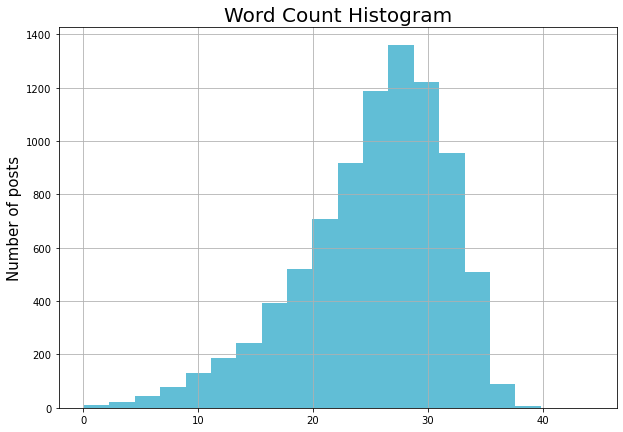

In [50]:
plt.figure(figsize=(10, 7))
plt.title("Word Count Histogram", fontsize=20)
plt.ylabel("Number of posts", fontsize=15)
personality_data["word_count"].hist(bins=20, color=nt)
plt.savefig(os.path.join(img_path, "word_hist.png"))
plt.show()



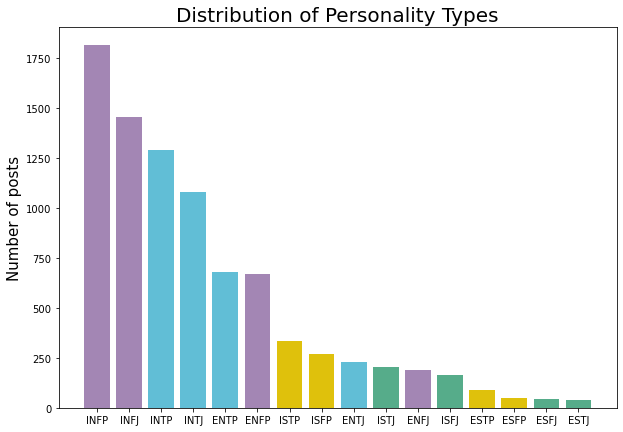

In [51]:
mb = (
    personality_data.groupby("type")
    .agg({"type": "count"})
    .rename(columns={"type": "count"})
    .sort_values("count", ascending=False)
)
colors = {x: colors_d[x] for x in mb.index.tolist()}
plt.figure(figsize=(10, 7))
plt.title("Distribution of Personality Types", fontsize=20)
plt.ylabel("Number of posts", fontsize=15)
plt.bar(mb.index, mb["count"], color=list(colors.values()))
plt.savefig(os.path.join(img_path, "type_hist.png"))
plt.show()


# Model Evaluation

In [52]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.compose import ColumnTransformer


!pip install -U imbalanced-learn



Requirement already up-to-date: imbalanced-learn in c:\users\alu student\anaconda3\lib\site-packages (0.8.0)


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [54]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score

In [55]:
!pip install delayed

In [56]:
import os
# class imbalance
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from imblearn.under_sampling import RandomUnderSampler


# model evaluation
from imblearn.metrics import classification_report_imbalanced
from imblearn.metrics import geometric_mean_score


In [57]:
# performance check
import time
import warnings

warnings.filterwarnings("ignore")

# sparse to dense
from sklearn.base import TransformerMixin


class DenseTransformer(TransformerMixin):
    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()


# saving the model
from joblib import dump



In [58]:
clean_personality_data.head(2)

,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,posts,clean_posts,qm,em,colons,emojis,word_count,unique_words,post_length_var,upper,link_count,ellipses,img_count
0,INFJ,0,0,0,1,'When asked of the things you wish you did ear...,asked thing wish earlier find answering...,0.08,0.22,0.32,0.08,30.98,14.92,78.414931,1.46,0.04,0.62,0.0
1,INFJ,0,0,0,1,'I love both and they are equally important to...,love equally important music window soul in...,0.12,0.36,0.14,0.00,28.58,12.72,160.744400,1.62,0.02,0.04,0.0


In [59]:
X = clean_personality_data[
    [
        "clean_posts",
        "word_count",
        "qm",
        "em",
        "colons",
        "emojis",
        "unique_words",
        "post_length_var",
        "upper",
        "link_count",
        "ellipses",
        "img_count",
    ]
]

# setting y to four target classes -> is_Extrovert, is_Sensing, is_Thinking, is_Judging
y = clean_personality_data.iloc[:, 1:5]

# ensuring that X and y row count matches
print(X.shape)
print(y.shape)

(8588, 12)
(8588, 4)


In [73]:
# Creating list of words to be dropped

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [60]:
additional_stopwords = [
    "hey",
    "hello",
    "briggs",
    "cat",
    "car",
    "mbti",
    "soup",
    "tea",
    "sport",
    "snow",
    "christmas",
]

In [61]:
counts_n_scores = [
    
    "qm",
    "em",
    "colons",
    "emojis",
    "word_count",
    "unique_words",
    "upper",
    "link_count",
    "ellipses",
    "img_count",
]

# for selecting k best features from features other than words
best_k_features = make_pipeline(MinMaxScaler(), SelectKBest(f_classif, k=10))

# setting up preprocessing for TF-IDF vectorizer
preprocesser_tf = ColumnTransformer(
    transformers=[
        (
            "tfidf",
            TfidfVectorizer(min_df=25, max_df=0.85, stop_words=additional_stopwords),
            "clean_posts",
        ),
        ("selectbest", best_k_features, counts_n_scores),
    ],
    remainder="passthrough",
)

# setting up preprocessing for COUNT vectorizer
preprocesser_ct = ColumnTransformer(
    transformers=[
        (
            "ct_vect",
            CountVectorizer(min_df=25, max_df=0.85, stop_words=additional_stopwords),
            "clean_posts",
        ),
        ("selectbest", best_k_features, counts_n_scores),
    ],
    remainder="passthrough",
)


In [62]:
counts_n_scores = [
"clean_posts",
        "word_count",
        "qm",
        "em",
        "colons",
        "emojis",
        "unique_words",
        "post_length_var",
        "upper",
        "link_count",
        "ellipses",
        "img_count",
]



In [63]:
# setting up the personality dictionary for printing scores for each class
mbti_type = {
    "is_Extrovert": "Extrovert vs Introvert",
    "is_Sensing": "Sensing vs Intuition",
    "is_Thinking": "Thinking vs Feeling",
    "is_Judging": "Judging vs Perceiving",
}

# function to build the model for predicting each of the 4 target classes
def build_model(model, X, target, vectorizer_name):

    for col in target.columns:

        print(f"\n{mbti_type[col]}")
        target = y[col]

        X_train, X_test, y_train, y_test = train_test_split(
            X, target, test_size=0.2, random_state=42, stratify=target
        )

        # model training
        model.fit(X_train, y_train)

        # y_hat
        y_pred = model.predict(X_test)

        # y_probability
        y_proba = model.predict_proba(X_test)[:, 1]

        # precision recall score
        average_precision = average_precision_score(y_test, y_proba)

        # model evaluation
        print(
            f"Geometric Mean Score: {geometric_mean_score(y_test, y_pred, average='weighted'):.2f}"
        )
        print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba):.2f}")
        print(f"Average Precision-Recall Score: {average_precision:.2f}")
        print(classification_report_imbalanced(y_test, y_pred))

# TF-IDF Logistic Regression


In [64]:
%%time

tfidf_logistic_regression = imb_make_pipeline(
    preprocesser_tf, RandomUnderSampler(), LogisticRegressionCV()
)
build_model(tfidf_logistic_regression, X, y, "tfidf")


Extrovert vs Introvert
Geometric Mean Score: 0.68
ROC-AUC Score: 0.75
Average Precision-Recall Score: 0.45
                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.67      0.68      0.76      0.68      0.46      1322
          1       0.39      0.68      0.67      0.49      0.68      0.46       396

avg / total       0.76      0.68      0.68      0.70      0.68      0.46      1718


Sensing vs Intuition
Geometric Mean Score: 0.72
ROC-AUC Score: 0.79
Average Precision-Recall Score: 0.40
                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.69      0.75      0.80      0.72      0.52      1481
          1       0.28      0.75      0.69      0.41      0.72      0.52       237

avg / total       0.85      0.70      0.74      0.75      0.72      0.52      1718


Thinking vs Feeling
Geometric Mean Score: 0.79
ROC-AUC Score: 0.87
Average Precision-Recall Score: 0.84
           


Extrovert vs Introvert
                 coef
word                 
fun          4.063504
bored        3.118322
guy          3.046545
business     2.474078
debate       2.462075
mind        -2.455372
nature      -2.434622
government  -2.421831
instinctual  2.360081
mother      -2.300079
family      -2.247693

Sensing vs Intuition
             coef
word             
idea    -3.532128
world   -3.498231
type     3.099851
rant     2.739686
dark    -2.526576
feel    -2.500807
woman   -2.395133
fun      2.394345
human   -2.107002
romance -2.100950
rave     2.094143

Thinking vs Feeling
               coef
word               
feel      -6.978350
love      -4.977986
female     4.829337
beautiful -4.175318
feeling   -4.054416
boring     3.659944
idealist  -3.649230
value     -3.592310
dream     -3.431479
plan       3.424359
shy       -3.382230

Judging vs Perceiving
                 coef
word                 
plan         4.539390
others       3.546564
help         3.481373
cold         3.31481

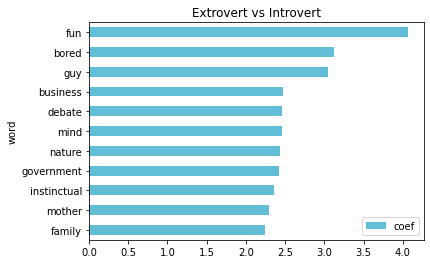

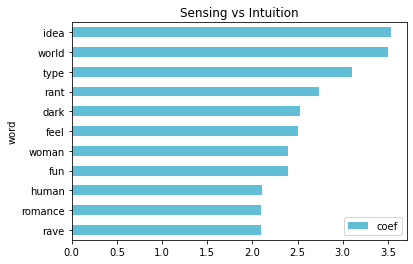

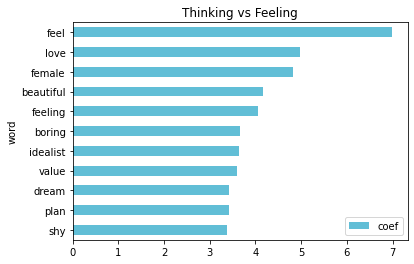

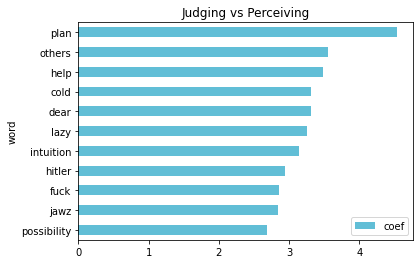

<IPython.core.display.Javascript object>

In [108]:
%%time

for col in y.columns:
    
    print(f"\n{mbti_type[col]}")

    target = y[col]

    tfidf_logistic_regression = imb_make_pipeline(
        preprocesser_tf,
        RandomUnderSampler(),
        LogisticRegressionCV()
    )
    
    # training the data on entire dataset
    tfidf_logistic_regression.fit(X, target)
    
    # feature importance   
    coef = tfidf_logistic_regression[-1].coef_[0]  
    word = tfidf_logistic_regression[0].named_transformers_["tfidf"].get_feature_names()
    word_list = list(zip(word, coef))         
    result = pd.DataFrame(word_list, columns=["word", "coef"]).set_index("word")    
    result = result.reindex(result.coef.abs().sort_values(ascending=False).index)[0:11]
    print(result)
    
    # plotting feature importance
    result["coef"] = result["coef"].apply(lambda x: abs(x))
    result.sort_values("coef", inplace=True)
    result.plot(kind="barh", color="#61BED6", title=mbti_type[col])
  
    # saving the model
    dump(tfidf_logistic_regression, f"clf_{col}.joblib")

In [109]:
# importing dependencies here
import numpy as np
import pandas as pd
import os

# visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# feature engineering
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download("stopwords")

# sentiment scoring
!pip install vaderSentiment


from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# pos tagging
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

# accuracy scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
)

# performance check
import time

# sparse to dense
from sklearn.base import TransformerMixin


class DenseTransformer(TransformerMixin):
    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()


# importing model
from joblib import load

# code formatter
%load_ext nb_black

[nltk_data] Downloading package stopwords to C:\Users\ALU
[nltk_data]     STUDENT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

# Predicting for the Holdout Dataset

In [110]:
# reading the test dataset
path_to_csv = os.path.join("..", "data", "df_holdout.csv")
df = pd.read_csv(path_to_csv)

<IPython.core.display.Javascript object>

In [111]:
# checking top records
df.head(5)

,type,posts
0,INFJ,'I have never seen so many poorly used memes.....
1,INFJ,'Wow! You are obviously her muse... Be flatter...
2,ENFP,'Are you shitting me? He's so type 7 its not e...
3,ENTP,"'Oh man, this is serious. Good luck with her! ..."
4,INFP,'Haha. Thank you! You guys have been so nice. ...


<IPython.core.display.Javascript object>

In [112]:
def categorize_types(personality_data):

    personality_data["is_Extrovert"] = personality_data["type"].apply(
        lambda x: 1 if x[0] == "E" else 0
    )
    personality_data["is_Sensing"] = personality_data["type"].apply(
        lambda x: 1 if x[1] == "S" else 0
    )
    personality_data["is_Thinking"] = personality_data["type"].apply(
        lambda x: 1 if x[2] == "T" else 0
    )
    personality_data["is_Judging"] = personality_data["type"].apply(
        lambda x: 1 if x[3] == "J" else 0
    )

    # rearranging the dataframe columns
    personality_data = personality_data[
        ["type", "is_Extrovert", "is_Sensing", "is_Thinking", "is_Judging", "posts"]
    ]


#######################################################################################################3


def clean_posts(personality_data):

    # converting posts into lower case
    personality_data["clean_posts"] = personality_data["posts"].str.lower()

    # replacing ||| with space
    personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
        re.compile(r"\|\|\|"), " "
    )

    # replacing urls with domain name
    personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
        re.compile(r"https?:\/\/(www)?.?([A-Za-z_0-9-]+)([\S])*"),
        ""
    )

    # dropping emails
    personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
        re.compile(r"\S+@\S+"), ""
    )

    # dropping punctuations
    personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
        re.compile(r"[^a-z\s]"), " "
    )

    # dropping MBTIs mentioned in the posts. There are quite a few mention of these types in these posts.
    mbti = personality_data["type"].unique()
    for type_word in mbti:
        personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
            type_word.lower(), ""
        )
        
    # removing words that are 1 to 2 characters long    
    personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    re.compile(r"\b\w{1,2}\b"), ""
    )

    # lemmitizing
    lemmatizer = WordNetLemmatizer()

    personality_data["clean_posts"] = personality_data["clean_posts"].apply(
        lambda x: " ".join(
            [
                lemmatizer.lemmatize(word)
                for word in x.split(" ")
                if word not in stopwords.words("english")
            ]
        )
    )

    # tag_posts will be a list of 50 lists. need it for word stats (per post for each user)
    # replacing urls with domain name
    personality_data["tag_posts"] = personality_data["posts"].str.replace(
        re.compile(r"https?:\/\/(www)?.?([A-Za-z_0-9-]+)([\S])*"),
        lambda match: match.group(2),
    )
    # replacing ||| with space
    personality_data["tag_posts"] = [
        post for post in personality_data["tag_posts"].str.split("\|\|\|")
    ]


#################################################################################################################





###############################################################################################################





###############################################################################################################


def get_counts(personality_data):
    def unique_words(s):
        unique = set(s.split(" "))
        return len(unique)/50

    def emojis(post):
        # does not include emojis made purely from symbols, only :word:
        emoji_count = 0
        words = post.split()
        for e in words:
            if "http" not in e:
                if e.count(":") == 2:
                    emoji_count += 1
        return emoji_count/50

    def colons(post):
        # Includes colons used in emojis
        colon_count = 0
        words = post.split()
        for e in words:
            if "http" not in e:
                colon_count += e.count(":")
        return colon_count/50

    personality_data["qm"] = personality_data["posts"].apply(lambda s: s.count("?")/50)
    personality_data["em"] = personality_data["posts"].apply(lambda s: s.count("!")/50)
    personality_data["colons"] = personality_data["posts"].apply(colons)
    personality_data["emojis"] = personality_data["posts"].apply(emojis)

    personality_data["word_count"] = personality_data["posts"].apply(
        lambda s: (s.count(" ") + 1)/50
    )
    personality_data["unique_words"] = personality_data["posts"].apply(unique_words)

    personality_data["upper"] = personality_data["posts"].apply(
        lambda x: len([x for x in x.split() if x.isupper()])/50
    )
    personality_data["link_count"] = personality_data["posts"].apply(
        lambda s: s.count("http")/50
    )
    ellipses_count = [
        len(re.findall(r"\.\.\.\ ", posts))/50 for posts in personality_data["posts"]
    ]
    personality_data["ellipses"] = ellipses_count
    personality_data["img_count"] = [
        len(re.findall(r"(\.jpg)|(\.jpeg)|(\.gif)|(\.png)", post))/50
        for post in personality_data["posts"]
    ]


<IPython.core.display.Javascript object>

In [113]:
def prep_data(personality_data):

    t = time.time()

    categorize_types(personality_data)

    clean_posts(personality_data)

    # sentiment_score(personality_data)

    get_counts(personality_data)

    features = personality_data[
        [
            "clean_posts",
            # "compound_sentiment",
            "qm",
            "em",
            "colons",
            "emojis",
            "word_count",
            "unique_words",
            "upper",
            "link_count",
            "ellipses",
            "img_count",
        ]
    ]

    X = features
    y = personality_data.iloc[:, 2:6]

    print(f"Total Preprocessing Time: {time.time()-t} seconds\n")

    return X, y

<IPython.core.display.Javascript object>

In [114]:
def combine_classes(y_pred1, y_pred2, y_pred3, y_pred4):

    combined = []
    for i in range(len(y_pred1)):
        combined.append(
            str(y_pred1[i]) + str(y_pred2[i]) + str(y_pred3[i]) + str(y_pred4[i])
        )

    result = trace_back(combined)
    return result


def trace_back(combined):

    type_list = [
        {"0": "I", "1": "E"},
        {"0": "N", "1": "S"},
        {"0": "F", "1": "T"},
        {"0": "P", "1": "J"},
    ]

    result = []
    for num in combined:
        s = ""
        for i in range(len(num)):
            s += type_list[i][num[i]]
        result.append(s)

    return result

<IPython.core.display.Javascript object>

In [115]:
def predict(path_to_csv):

    df = pd.read_csv(path_to_csv)

    X, y = prep_data(df)

    # loading the 4 models
    EorI_model = load(os.path.join("..", "models", "clf_is_Extrovert.joblib"))
    SorN_model = load(os.path.join("..", "models", "clf_is_Sensing.joblib"))
    TorF_model = load(os.path.join("..", "models", "clf_is_Thinking.joblib"))
    JorP_model = load(os.path.join("..", "models", "clf_is_Judging.joblib"))

    # predicting
    EorI_pred = EorI_model.predict(X)
    print(
        "Extrovert vs Introvert Accuracy: ",
        accuracy_score(y["is_Extrovert"], EorI_pred),
    )
    print("y_true", y["is_Extrovert"].values)
    print("preds", EorI_pred)

    SorN_pred = SorN_model.predict(X)
    print(
        "\nSensing vs Intuition Accuracy: ", accuracy_score(y["is_Sensing"], SorN_pred)
    )
    print("y_true", y["is_Sensing"].values)
    print("preds", SorN_pred)

    TorF_pred = TorF_model.predict(X)
    print(
        "\nThinking vs Feeling Accuracy: ", accuracy_score(y["is_Thinking"], TorF_pred)
    )
    print("y_true", y["is_Thinking"].values)
    print("preds", TorF_pred)

    JorP_pred = JorP_model.predict(X)
    print(
        "\nJudging vs Perceiving Accuracy: ", accuracy_score(y["is_Judging"], JorP_pred)
    )
    print("y_true", y["is_Judging"].values)
    print("preds", JorP_pred)

    # combining the predictions from the 4 models
    result = combine_classes(EorI_pred, SorN_pred, TorF_pred, JorP_pred)

    return result

<IPython.core.display.Javascript object>

In [116]:
if __name__ == "__main__":

    predictions = predict(os.path.join("..", "data", "df_holdout.csv"))
    y_truth = pd.read_csv(os.path.join("..", "data", "df_holdout.csv"))["type"].values

Total Preprocessing Time: 54.483465909957886 seconds



ValueError: X has 11 features, but ColumnTransformer is expecting 22 features as input.

<IPython.core.display.Javascript object>

In [118]:
mbti = [
    "INFP",
    "INFJ",
    "INTP",
    "INTJ",
    "ENTP",
    "enfp",
    "ISTP",
    "ISFP",
    "ENTJ",
    "ISTJ",
    "ENFJ",
    "ISFJ",
    "ESTP",
    "ESFP",
    "ESFJ",
    "ESTJ",
]
tags_dict = {
    "X": ["FW", "LS", "UH"],
}
features = [
    "clean_posts",
    "qm",
    "em",
    "colons",
    "emojis",
    "word_count",
    "unique_words",
    "upper",
    "link_count",
    "ellipses",
    "img_count",
]


def unique_words(s):
    unique = set(s.split(" "))
    return len(unique)


def emojis(post):
    # does not include emojis made purely from symbols, only :word:
    emoji_count = 0
    words = post.split()
    for e in words:
        if "http" not in e:
            if e.count(":") == 2:
                emoji_count += 1
    return emoji_count


def colons(post):
    # Includes colons used in emojis
    colon_count = 0
    words = post.split()
    for e in words:
        if "http" not in e:
            colon_count += e.count(":")
    return colon_count


def lemmitize(s):
    lemmatizer = WordNetLemmatizer()
    new_s = ""
    for word in s.split(" "):
        lemmatizer.lemmatize(word)
        if word not in stopwords.words("english"):
            new_s += word + " "
    return new_s[:-1]


def clean(s):
    # remove urls
    s = re.sub(re.compile(r"https?:\/\/(www)?.?([A-Za-z_0-9-]+).*"), "", s)
    # remove emails
    s = re.sub(re.compile(r"\S+@\S+"), "", s)
    # remove punctuation
    s = re.sub(re.compile(r"[^a-z\s]"), "", s)
    # Make everything lowercase
    s = s.lower()
    # remove all personality types
    for type_word in mbti:
        s = s.replace(type_word.lower(), "")
    return s


def prep_counts(s):
    clean_s = clean(s)
    d = {
        "clean_posts": lemmitize(clean_s),
        "link_count": s.count("http"),
        "youtube": s.count("youtube") + s.count("youtu.be"),
        "img_count": len(re.findall(r"(\.jpg)|(\.jpeg)|(\.gif)|(\.png)", s)),
        "upper": len([x for x in s.split() if x.isupper()]),
        "char_count": len(s),
        "word_count": clean_s.count(" ") + 1,
        "qm": s.count("?"),
        "em": s.count("!"),
        "colons": colons(s),
        "emojis": emojis(s),
        "unique_words": unique_words(clean_s),
        "ellipses": len(re.findall(r"\.\.\.\ ", s)),
    }
    return clean_s, d


def prep_data(s):
    clean_s, d = prep_counts(s)
    # d.update(prep_sentiment(lemmitize(clean_s)))
    # d.update(tag_pos(clean_s))
    return pd.DataFrame([d])[features]


if __name__ == "__main__":
    t = time.time()
    string = "That somehow managed to be record short yet answer almost all the questions we would've asked, haha! Hi Deb! Welcome to Hou Tian; nice to meet you! I'm Jhenne, one of the mods here-- which means I gotta give you the modly speech :] Make sure to check out the Mandatory Reading up top! Our constantly updated Library is also a great resource, though it isn't mandatory reading-- we like to tell members to 'read as you need', rather than marathon read it all at once. One of the most helpful threads is the Gameplay So Far thread, which breaks down what all has gone down on the boards. (Now, the summary for January isn't tossed up yet, but we'd be happy to break down what you missed if you'd like.) I see that you're interested in Mai! That means both the Trying for a Canon Character page, and the Canon Character Rules and Consequences post will be helpful to check out. If you're ever considering an original character, we have our player-made adoptables list, and our factions, comprised of the Jade Shark/Bending Opposition, Original People of the Flame, and The Bending Crime Syndicates. As far as characters go, in the past tense I play Srai, a Jade Shark [s]that is very very dusty. In the Korraverse I play a reporter named Chihiro, and an ex-taxi dancer/wannabe actress named Naoki, and a Republic City University student named Haruna. I think that's it! If you have any questions, don't hesitate to ask a mod, or drop it right here in this thread so we can get back to you! Again, welcome! #CONFETTI"
    print(string)
    print(prep_data(string))
    print(f"Preprocessing Time: {time.time() - t} seconds")

That somehow managed to be record short yet answer almost all the questions we would've asked, haha! Hi Deb! Welcome to Hou Tian; nice to meet you! I'm Jhenne, one of the mods here-- which means I gotta give you the modly speech :] Make sure to check out the Mandatory Reading up top! Our constantly updated Library is also a great resource, though it isn't mandatory reading-- we like to tell members to 'read as you need', rather than marathon read it all at once. One of the most helpful threads is the Gameplay So Far thread, which breaks down what all has gone down on the boards. (Now, the summary for January isn't tossed up yet, but we'd be happy to break down what you missed if you'd like.) I see that you're interested in Mai! That means both the Trying for a Canon Character page, and the Canon Character Rules and Consequences post will be helpful to check out. If you're ever considering an original character, we have our player-made adoptables list, and our factions, comprised of the

<IPython.core.display.Javascript object>

In [119]:
def predict(s):
    return len(s.split(" "))


def predict_e(s):

    X = prep_data(s)

    # loading the 4 models
    EorI_model = load(os.path.join("..", "models", "clf_is_Extrovert.joblib"))
    SorN_model = load(os.path.join("..", "models", "clf_is_Sensing.joblib"))
    TorF_model = load(os.path.join("..", "models", "clf_is_Thinking.joblib"))
    JorP_model = load(os.path.join("..", "models", "clf_is_Judging.joblib"))

    # predicting
    EorI_pred = EorI_model.predict(X)
    print("preds", EorI_pred)

    SorN_pred = SorN_model.predict(X)
    print("preds", SorN_pred)

    TorF_pred = TorF_model.predict(X)
    print("preds", TorF_pred)

    JorP_pred = JorP_model.predict(X)
    print("preds", JorP_pred)

    # combining the predictions from the 4 models
    result = combine_classes(EorI_pred, SorN_pred, TorF_pred, JorP_pred)

    return result[0]


if __name__ == "__main__":
    t = time.time()
    # sample test string. Type ISTP.
    string = "I plugged the data into tableau to see how the different features or how various mathematical formulas relate to the Weight. Once I had a few that didn’t have a wide distribution, I just started trying different models, even ones we hadn’t gone over yet. There are a LOT of regression models. I do not like this try everything method, it’s inefficient and illogical."
    print(predict_e(string))
    print(f"Preprocessing Time: {(time.time() - t):.2f} seconds")

ValueError: X has 11 features, but ColumnTransformer is expecting 22 features as input.

<IPython.core.display.Javascript object>

# Count Vectorized Logistic Regression

In [93]:
%%time
ct_logistic_regression = imb_make_pipeline(
    preprocesser_ct, RandomUnderSampler(), LogisticRegressionCV()
)
build_model(ct_logistic_regression, X, y, "ct_vect")


Extrovert vs Introvert
Geometric Mean Score: 0.65
ROC-AUC Score: 0.71
Average Precision-Recall Score: 0.39
                   pre       rec       spe        f1       geo       iba       sup

          0       0.86      0.68      0.63      0.76      0.65      0.43      1322
          1       0.37      0.63      0.68      0.46      0.65      0.42       396

avg / total       0.75      0.67      0.64      0.69      0.65      0.43      1718


Sensing vs Intuition
Geometric Mean Score: 0.71
ROC-AUC Score: 0.78
Average Precision-Recall Score: 0.37
                   pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.65      0.78      0.77      0.71      0.50      1481
          1       0.26      0.78      0.65      0.39      0.71      0.51       237

avg / total       0.85      0.67      0.76      0.72      0.71      0.50      1718


Thinking vs Feeling
Geometric Mean Score: 0.77
ROC-AUC Score: 0.85
Average Precision-Recall Score: 0.82
           

<IPython.core.display.Javascript object>

# TF-IDF Logistic Lasso

In [94]:
%%time
tfidf_logistic_regression_lasso = imb_make_pipeline(
    preprocesser_tf, RandomUnderSampler(), LogisticRegressionCV(penalty='l1', solver='saga' )
)
build_model(tfidf_logistic_regression_lasso, X, y, "tfidf")


Extrovert vs Introvert
Geometric Mean Score: 0.65
ROC-AUC Score: 0.70
Average Precision-Recall Score: 0.42
                   pre       rec       spe        f1       geo       iba       sup

          0       0.87      0.61      0.70      0.72      0.65      0.42      1322
          1       0.35      0.70      0.61      0.47      0.65      0.43       396

avg / total       0.75      0.63      0.68      0.66      0.65      0.42      1718


Sensing vs Intuition
Geometric Mean Score: 0.54
ROC-AUC Score: 0.57
Average Precision-Recall Score: 0.18
                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.53      0.55      0.66      0.54      0.29      1481
          1       0.16      0.55      0.53      0.25      0.54      0.29       237

avg / total       0.78      0.53      0.55      0.61      0.54      0.29      1718


Thinking vs Feeling


KeyboardInterrupt: 

<IPython.core.display.Javascript object>

# Count Vectorized Logistic Lasso

In [ ]:
ct_logistic_regression_lasso = imb_make_pipeline(
    preprocesser_ct, RandomUnderSampler(), LogisticRegressionCV(penalty='l1', solver='saga' )
)
build_model(ct_logistic_regression_lasso, X, y, "ct_vect")

# TF-IDF Logistic Ridge

In [96]:
tfidf_logistic_regression_ridge = imb_make_pipeline(
    preprocesser_tf,
    RandomUnderSampler(),
    LogisticRegressionCV(penalty="l2", solver="saga"),
)
build_model(tfidf_logistic_regression_ridge, X, y, "tfidf")


Extrovert vs Introvert
Geometric Mean Score: 0.62
ROC-AUC Score: 0.66
Average Precision-Recall Score: 0.37
                   pre       rec       spe        f1       geo       iba       sup

          0       0.85      0.58      0.66      0.69      0.62      0.38      1322
          1       0.32      0.66      0.58      0.43      0.62      0.39       396

avg / total       0.73      0.60      0.64      0.63      0.62      0.39      1718


Sensing vs Intuition
Geometric Mean Score: 0.56
ROC-AUC Score: 0.58
Average Precision-Recall Score: 0.19
                   pre       rec       spe        f1       geo       iba       sup

          0       0.89      0.59      0.53      0.71      0.56      0.32      1481
          1       0.17      0.53      0.59      0.26      0.56      0.31       237

avg / total       0.79      0.58      0.54      0.65      0.56      0.32      1718


Thinking vs Feeling
Geometric Mean Score: 0.69
ROC-AUC Score: 0.76
Average Precision-Recall Score: 0.72
           

<IPython.core.display.Javascript object>

# Count Vectorized Logistic Ridge

In [97]:
ct_logistic_regression_ridge = imb_make_pipeline(
    preprocesser_ct,
    RandomUnderSampler(),
    LogisticRegressionCV(penalty="l2", solver="saga"),
)
build_model(ct_logistic_regression_ridge, X, y, "ct_vect")


Extrovert vs Introvert
Geometric Mean Score: 0.65
ROC-AUC Score: 0.71
Average Precision-Recall Score: 0.40
                   pre       rec       spe        f1       geo       iba       sup

          0       0.85      0.68      0.61      0.76      0.64      0.42      1322
          1       0.36      0.61      0.68      0.46      0.64      0.41       396

avg / total       0.74      0.66      0.63      0.69      0.64      0.42      1718


Sensing vs Intuition
Geometric Mean Score: 0.70
ROC-AUC Score: 0.76
Average Precision-Recall Score: 0.32
                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.67      0.73      0.78      0.70      0.48      1481
          1       0.26      0.73      0.67      0.38      0.70      0.49       237

avg / total       0.85      0.68      0.72      0.73      0.70      0.49      1718


Thinking vs Feeling
Geometric Mean Score: 0.77
ROC-AUC Score: 0.85
Average Precision-Recall Score: 0.82
           

<IPython.core.display.Javascript object>

In [2]:
%%time

for col in y.columns:
    
    print(f"\n{mbti_type[col]}")

    target = y[col]

    tfidf_logistic_regression = imb_make_pipeline(
        preprocesser_tf,
        RandomUnderSampler(),
        LogisticRegressionCV()
    )
    
    # training the data on entire dataset
    tfidf_logistic_regression.fit(X, target)
    
    # feature importance   
    coef = tfidf_logistic_regression[-1].coef_[0]  
    word = tfidf_logistic_regression[0].named_transformers_["tfidf"].get_feature_names()
    word_list = list(zip(word, coef))         
    result = pd.DataFrame(word_list, columns=["word", "coef"]).set_index("word")    
    result = result.reindex(result.coef.abs().sort_values(ascending=False).index)[0:21]
    print(result)
    
    # plotting feature importance
    result["coef"] = result["coef"].apply(lambda x: abs(x))
    result.sort_values("coef", inplace=True)
    result.plot(kind="barh", color="#61BED6", title=mbti_type[col])
  
    # saving the model
    dump(tfidf_logistic_regression, f"clf_{col}.joblib")

NameError: name 'y' is not defined